In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
df = pd.read_csv("D:\skripsi\Smart Agriculture Technology for Reliable Intelligent Automation\CAPSTONE PROJECT\COBA COBA\dataset.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\blast\AppData\Local\Temp\ipykernel_39700\3884906493.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("D:\skripsi\Smart Agriculture Technology for Reliable Intelligent Automation\CAPSTONE PROJECT\COBA COBA\dataset.csv")


,suhu,kelembaban,kelembaban_tanah,intensitas_cahaya,label
0,41.74,33.19,60.54,91.00,1
1,53.48,43.74,33.79,26.62,0
2,64.95,91.36,17.43,17.89,1
3,90.11,54.85,52.68,98.15,0
4,23.68,81.66,6.62,86.11,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   suhu               999 non-null    float64
 1   kelembaban         999 non-null    float64
 2   kelembaban_tanah   999 non-null    float64
 3   intensitas_cahaya  999 non-null    float64
 4   label              999 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [21]:
df.isnull().sum()

suhu                 0
kelembaban           0
kelembaban_tanah     0
intensitas_cahaya    0
label                0
dtype: int64

In [22]:
df.describe()

,suhu,kelembaban,kelembaban_tanah,intensitas_cahaya,label
count,999.000000,999.000000,999.000000,999.000000,999.000000
mean,52.649409,49.934765,46.067037,53.224865,0.500501
std,28.292474,28.047261,29.536547,29.291084,0.500250
min,-0.010000,0.200000,0.290000,0.080000,0.000000
25%,29.160000,25.820000,19.675000,27.575000,0.000000
50%,54.600000,49.510000,44.200000,54.200000,1.000000
75%,76.845000,75.375000,70.885000,80.365000,1.000000
max,99.970000,99.940000,99.860000,99.980000,1.000000


array([[<Axes: title={'center': 'suhu'}>,
        <Axes: title={'center': 'kelembaban'}>],
       [<Axes: title={'center': 'kelembaban_tanah'}>,
        <Axes: title={'center': 'intensitas_cahaya'}>],
       [<Axes: title={'center': 'label'}>, <Axes: >]], dtype=object)

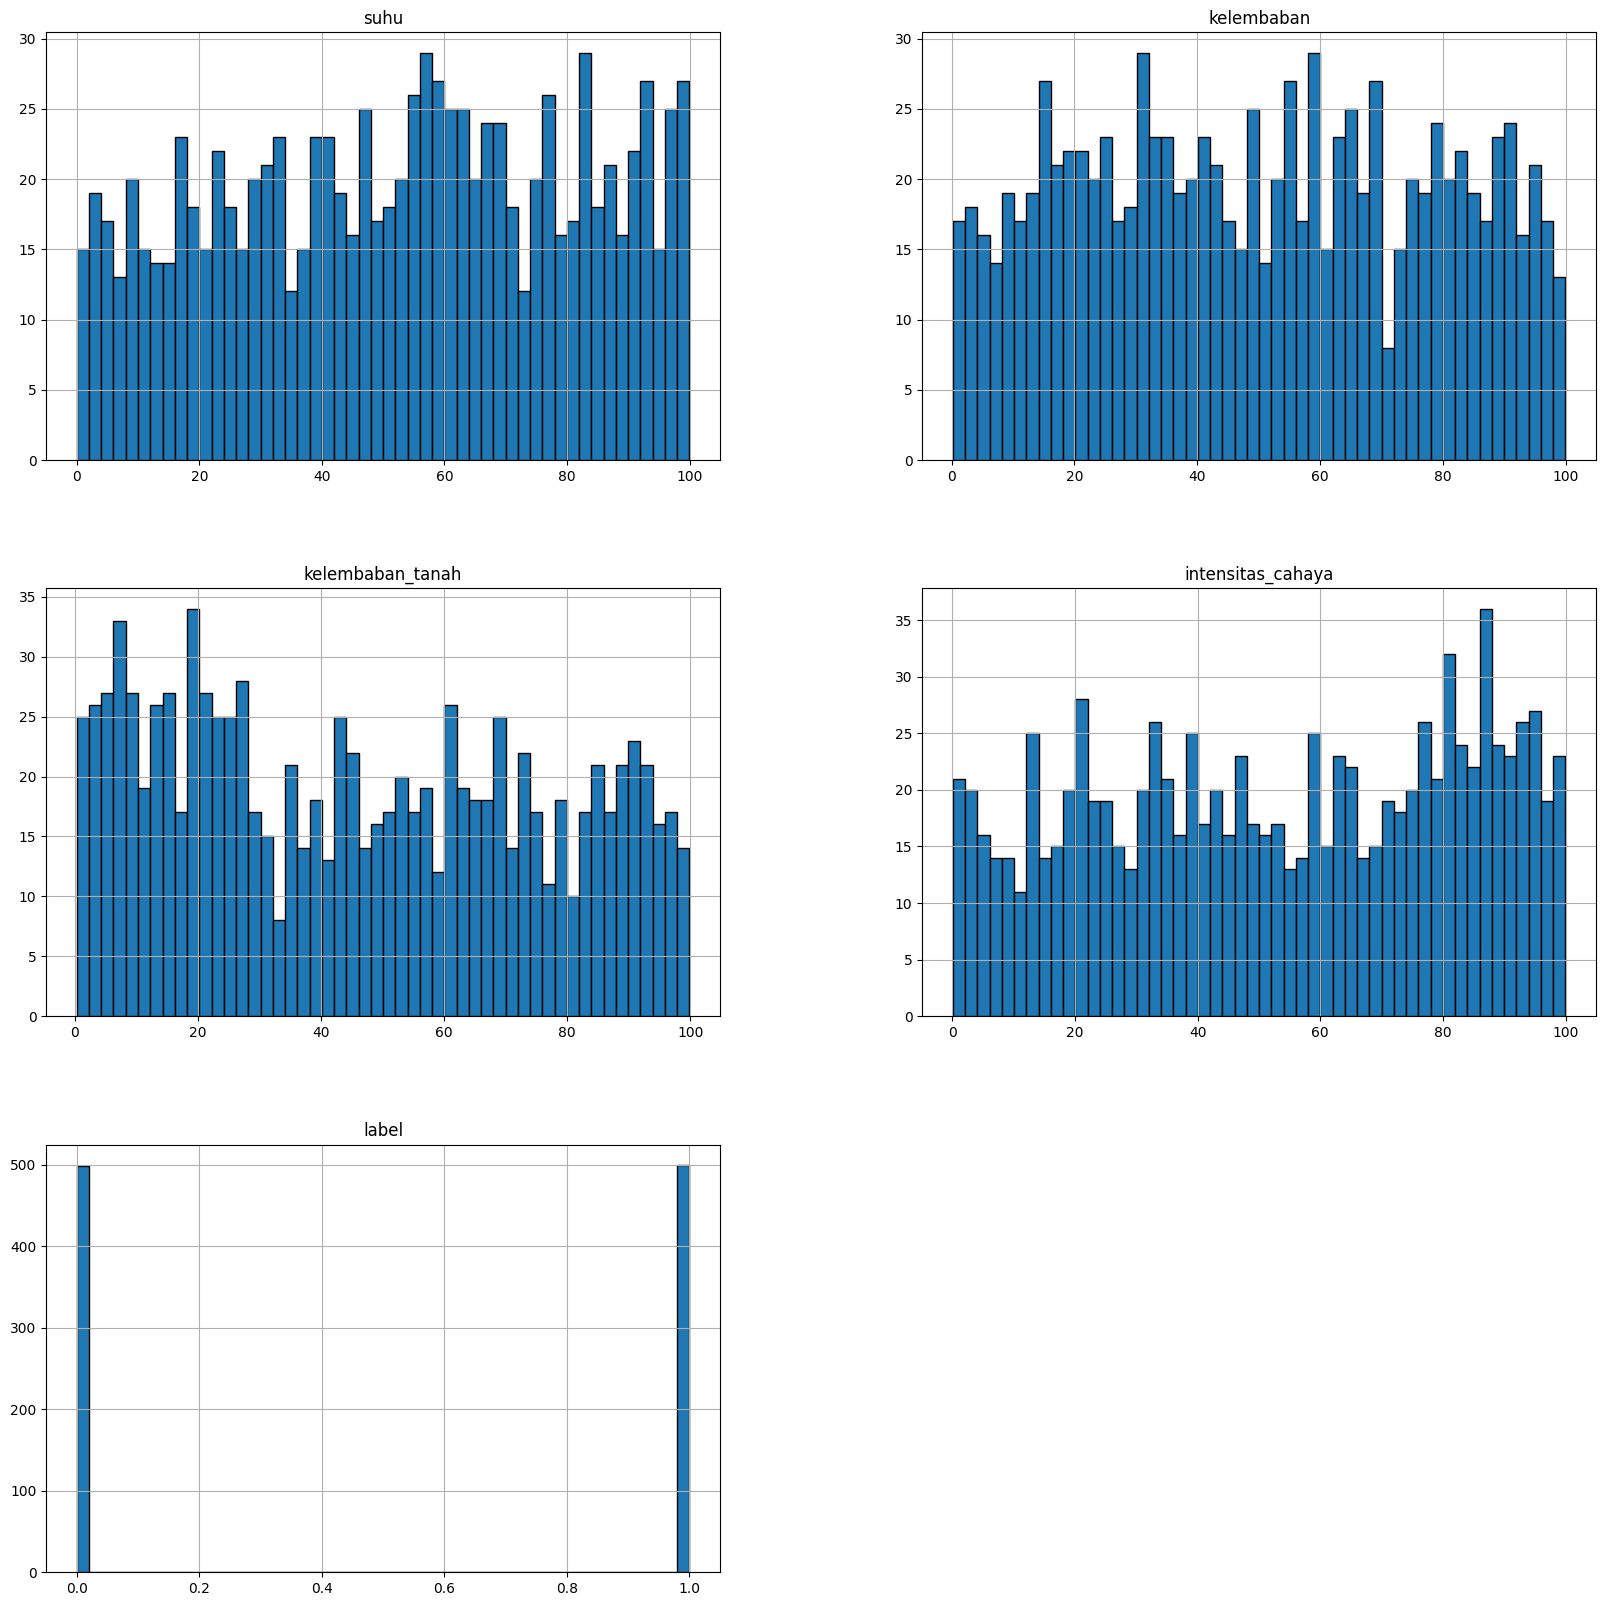

In [23]:
df.hist(figsize=(20, 20), bins=50, edgecolor='black')

In [24]:
X = df[["suhu","kelembaban","kelembaban_tanah","intensitas_cahaya"]]  # fitur
y = df["label"]  # target

In [25]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred = model.predict(X_test)

In [29]:
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 0.9866666666666667

Confusion Matrix:
 [[146   2]
 [  2 150]]

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.99      0.99      0.99       152

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [30]:
tree_rules = export_text(model, feature_names=list(X_train.columns))
print(tree_rules)

|--- kelembaban_tanah <= 30.97
|   |--- class: 1
|--- kelembaban_tanah >  30.97
|   |--- intensitas_cahaya <= 70.63
|   |   |--- class: 0
|   |--- intensitas_cahaya >  70.63
|   |   |--- kelembaban <= 50.59
|   |   |   |--- suhu <= 29.50
|   |   |   |   |--- class: 0
|   |   |   |--- suhu >  29.50
|   |   |   |   |--- class: 1
|   |   |--- kelembaban >  50.59
|   |   |   |--- class: 0

